<a href="https://colab.research.google.com/github/sergiochaza/analisis-de-trends/blob/main/ProyectoDSParteII%2BChazarreta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Análisis de Canciones Virales: Cómo anticiparse a los trends de TikTok + Spotify


**Autor:** Sergio Chazarreta  
**Fecha:** Abril 2025  
**Curso:** Comisión 75665 Data Science I

In [ ]:
#Importamos las bibliotecas y la ruta del archivo que vamos a utilizar
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Cargamos las bases de datos a utilizar
spotify = pd.read_csv("/content/drive/MyDrive/Analisis de Spotify y Tik Tok :  Sergio Chazarreta /Entrega 1/Base de Datos Spotify.csv")
tiktok = pd.read_csv("/content/drive/MyDrive/Analisis de Spotify y Tik Tok :  Sergio Chazarreta /Entrega 1/tiktok_viral_tracks.csv")

### 📝 Abstract

Como profesional que trabaja con redes sociales y analiza el comportamiento digital de las marcas, he notado un patrón recurrente: muchas empresas —especialmente grandes entidades como bancos— se suman tarde a los trends virales de TikTok. Esta demora provoca que sus contenidos pierdan impacto, obtengan escasas interacciones y generen una imagen de "llegar tarde a la fiesta".

La raíz de este problema puede deberse a procesos burocráticos internos que ralentizan la aprobación de contenidos. Sin embargo, si las marcas pudieran anticiparse a las tendencias musicales, tendrían tiempo para gestionar producciones, aprobar creatividades y lanzar campañas justo cuando el trend está en su punto más alto.

Este análisis surge como respuesta a esa problemática. Me propuse detectar patrones en canciones que se vuelven virales tanto en TikTok como en Spotify, para que las marcas, agencias de marketing o influencers puedan planificar y subirse al trend de forma oportuna —o incluso generarlo.

Utilicé dos datasets: uno con canciones virales de TikTok y otro con métricas de Spotify. Luego de una limpieza profunda de ambos, realicé un cruce (merge) por nombre de canción y artista, utilizando un join del tipo *inner*, para quedarme únicamente con las coincidencias.

A lo largo del proyecto exploré preguntas clave:  
🎧 ¿Qué estilos musicales tienden a viralizarse?  
📅 ¿En qué días o meses aparecen más canciones virales?  
🇦🇷 ¿Qué canciones funcionan especialmente bien en Argentina?

Utilizando herramientas como Colab, Pandas, Matplotlib y Seaborn, obtuve visualizaciones que permiten observar patrones útiles para el diseño de campañas musicales o de contenido viral. Si una canción tiene características como alta energía, valence positivo y alta bailabilidad, puede anticiparse como un buen candidato para contenidos de marca.

Este trabajo está orientado a agencias de marketing, equipos creativos o marcas grandes que desean adelantarse a las tendencias y crear contenido en sintonía con lo que realmente conecta con el público. Porque en el mundo digital, llegar a tiempo no es una ventaja: es una necesidad.


## 🎯 Objetivo del análisis

El objetivo principal de este proyecto fue **identificar patrones y características comunes** en canciones que se vuelven virales tanto en TikTok como en Spotify. Al detectar estas señales tempranas, una marca o agencia puede anticipar campañas publicitarias, optimizar sus tiempos de producción y sumarse a los trends en el momento justo, maximizando su impacto en redes sociales.

---

## ❓ Preguntas clave del análisis

Estas son las preguntas que guiaron la exploración de los datos:

- 📅 ¿En qué **meses del año** se lanzan más canciones que terminan siendo virales?
- 🗓️ ¿Qué **días de la semana** concentran más canciones virales?
- 🎧 ¿Qué **géneros musicales** dominan los trends?
- 🇦🇷 ¿Qué canciones y artistas son más virales **en Argentina**?
- 💃 ¿Qué **perfil musical** (valence, energy y danceability) comparten las canciones virales?
- 💡 ¿Se pueden anticipar futuras canciones virales con base en estas características?

---

## 🧪 Hipótesis de partida

> "Las canciones virales tienen un perfil emocional y rítmico definido —son alegres, enérgicas y bailables— y tienden a publicarse en determinados momentos  del año, lo cual puede ser aprovechado estratégicamente por marcas para diseñar campañas virales más efectivas."


In [ ]:
#Chequeando la estructura de ambos Dataframes
print(spotify.head())
print(spotify.columns)

   Unnamed: 0 country        date  position  \
0           0  Global  05/11/2020       1.0   
1           1  Global  05/11/2020       2.0   
2           2  Global  05/11/2020       3.0   
3           3  Global  05/11/2020       4.0   
4           4  Global  05/11/2020       5.0   

                                                 uri  \
0  https://open.spotify.com/track/47EiUVwUp4C9fGc...   
1  https://open.spotify.com/track/35mvY5S1H3J2QZy...   
2  https://open.spotify.com/track/3tjFYV6RSFtuktY...   
3  https://open.spotify.com/track/7hxHWCCAIIxFLCz...   
4  https://open.spotify.com/track/4y4spB9m0Q6026K...   

                               track        title                    artist  
0   Dakiti , Bad Bunny, Jhay Cortez       Dakiti    Bad Bunny, Jhay Cortez   
1         positions , Ariana Grande    positions             Ariana Grande   
2                  Mood  , 24kGoldn        Mood                   24kGoldn   
3        Lemonade  , Internet Money    Lemonade             Internet

In [ ]:
#Chequeando la estructura de ambos Dataframes
print(tiktok.head())
print(tiktok.columns)

                 track_id                           track_name  \
0  5496lks6V3fh1mZAB6IAap  Alibi (with Pabllo Vittar & Yseult)   
1  1BJJbSX6muJVF2AK7uH1x4                                 Move   
2  5nPbKG04fhLkIAjcPFaZq7          I Adore You (feat. Daecolm)   
3  5b3XJ1pjrHO5JtY2PcTjnI           Mamushi (feat. Yuki Chiba)   
4  2GxrNKugF82CnoRFbQfzPf           i like the way you kiss me   

           artist_name  danceability  energy    tempo  loudness  acousticness  \
0            Sevdaliza         0.741   0.754  126.980    -5.412      0.005260   
1            Adam Port         0.727   0.782  119.992    -8.529      0.056300   
2                HUGEL         0.704   0.787  119.996    -6.751      0.009260   
3  Megan Thee Stallion         0.892   0.531   81.036    -4.968      0.033000   
4              Artemas         0.599   0.946  151.647    -4.263      0.000938   

   valence  instrumentalness  liveness  mode  key  speechiness  \
0    0.717          0.000008    0.1250     0   11 

In [ ]:
#convertimos las fechas
spotify["date"] = pd.to_datetime(spotify["date"], dayfirst=True) #Como la fechas, interpretando que el dia está primero. Sinó datetime interpreta como el formato estadounidense
spotify["day_of_week"] = spotify["date"].dt.day_name() #Colocamos una columna con los dias

In [ ]:
#Limpieza de datos y normalización de datos
def limpiar_cancion(cancion):  #Función para limpiar datos
    if pd.isnull(cancion):
        return ""
    return cancion.lower().strip().replace("&", "and").replace("'", "").replace("feat.", "").replace("ft.", "")
#Cargamos los datos limpios
spotify["title_clean"] = spotify['title'].apply(limpiar_cancion)
spotify["artist_clean"] = spotify['artist'].apply(limpiar_cancion)

tiktok["track_name_clean"] = tiktok['track_name'].apply(limpiar_cancion)
tiktok["artist_name_clean"] = tiktok['artist_name'].apply(limpiar_cancion)

In [ ]:
#Limpieza y verificación de valores nulos
print("Valores nulos, spotify")
print(spotify.isnull().sum())

Valores nulos, spotify
Unnamed: 0          0
country             1
date                1
position            1
uri                 1
track               1
title               1
artist          15642
day_of_week         1
title_clean         0
artist_clean        0
dtype: int64


In [ ]:
#Limpieza y verificación de valores nulos
print("Valores nulos, tiktok")
print(tiktok.isnull().sum())

Valores nulos, tiktok
track_id               0
track_name             0
artist_name            0
danceability           0
energy                 0
tempo                  0
loudness               0
acousticness           0
valence                0
instrumentalness       0
liveness               0
mode                   0
key                    0
speechiness            0
time_signature         0
genres                 0
genre                102
track_name_clean       0
artist_name_clean      0
dtype: int64


In [ ]:
#Valores duplicados
print("Valores duplicados, spotify")
spotify.duplicated().sum()

Valores duplicados, spotify


np.int64(0)

In [ ]:
#valores duplicados
print("Valores duplicados, tiktok")
tiktok.duplicated().sum()

Valores duplicados, tiktok


np.int64(0)

In [ ]:
print(spotify.columns)
print(tiktok.columns)

Index(['Unnamed: 0', 'country', 'date', 'position', 'uri', 'track', 'title',
       'artist', 'day_of_week', 'title_clean', 'artist_clean'],
      dtype='object')
Index(['track_id', 'track_name', 'artist_name', 'danceability', 'energy',
       'tempo', 'loudness', 'acousticness', 'valence', 'instrumentalness',
       'liveness', 'mode', 'key', 'speechiness', 'time_signature', 'genres',
       'genre', 'track_name_clean', 'artist_name_clean'],
      dtype='object')


In [ ]:
#Combinamos los datos
df_combinados = pd.merge(spotify,tiktok, left_on=["title_clean", "artist_clean"], right_on=["track_name_clean","artist_name_clean"], how="inner")

In [ ]:
#Coincidencias
print(df_combinados.shape[0])
#Columnas
print(df_combinados.columns)

367182
Index(['Unnamed: 0', 'country', 'date', 'position', 'uri', 'track', 'title',
       'artist', 'day_of_week', 'title_clean', 'artist_clean', 'track_id',
       'track_name', 'artist_name', 'danceability', 'energy', 'tempo',
       'loudness', 'acousticness', 'valence', 'instrumentalness', 'liveness',
       'mode', 'key', 'speechiness', 'time_signature', 'genres', 'genre',
       'track_name_clean', 'artist_name_clean'],
      dtype='object')


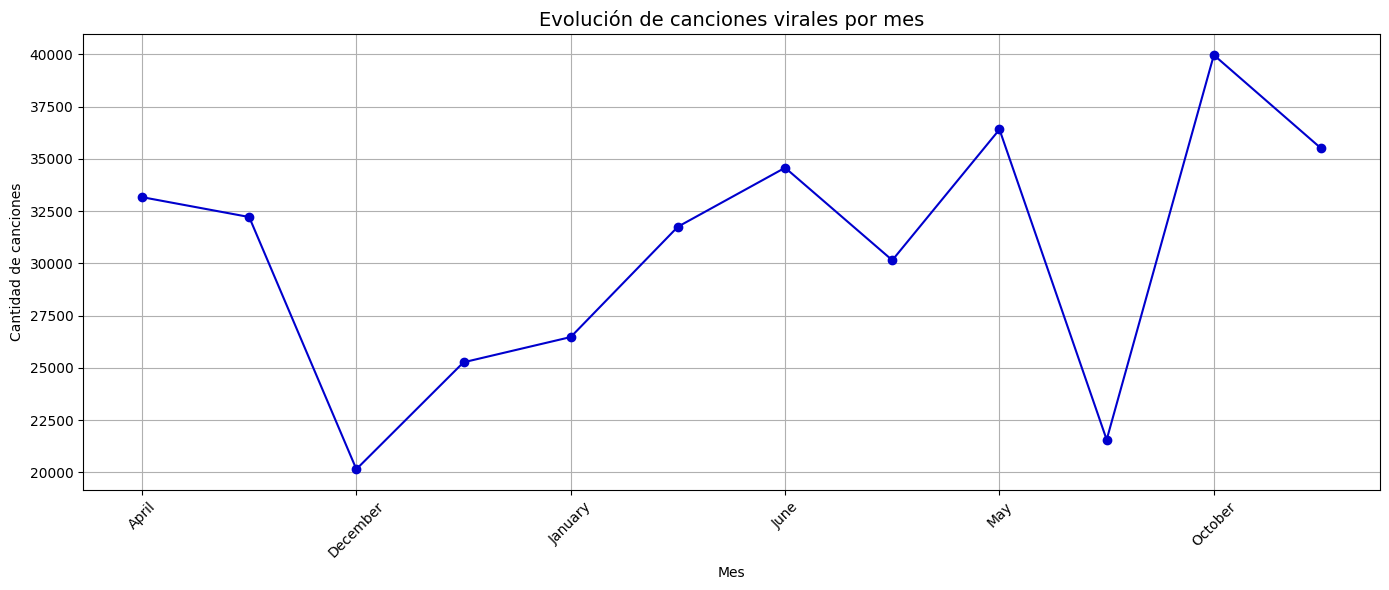

In [ ]:
import matplotlib.pyplot as plt
"""
Grafico Univariado
"""
#Calculamos las canciones virales que hay por mes
df_combinados["month"] = df_combinados["date"].dt.month_name() #Pasamos los datos mes a una columna
canciones_por_mes = df_combinados["month"].value_counts().sort_index() #Contamos los datos por mes

#Graficamos las canciones virales por mes
plt.figure(figsize=(14,6))
canciones_por_mes.plot(kind="line", marker='o', color="mediumblue")

plt.title("Evolución de canciones virales por mes", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("Cantidad de canciones")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📅 Canciones virales por mes

En el gráfico podemos observar la **evolución mensual de canciones virales** que aparecen tanto en TikTok como en Spotify.

📌 Se destacan dos picos importantes:
- 🔼 **Octubre**: con el valor más alto del año, lo que puede deberse a lanzamientos musicales de primavera/verano en el hemisferio sur, o a campañas de marketing pre Black Friday/Halloween.
- 🔼 **Mayo**: también muestra una alta concentración de canciones virales, posiblemente relacionado con lanzamientos de mitad de año

En contraste, se observan **caídas significativas** en:
- 🔽 **Septiembre**
- 🔽 **Diciembre**

🎄 En el caso de diciembre, la baja puede explicarse por el enfoque en campañas navideñas tradicionales y una menor rotación de nuevos trends musicales.  
📉 Septiembre también podría verse afectado por un período de menor actividad creativa o saturación previa a lanzamientos de fin de año.

---

🔍 **Conclusión parcial**:
> Existen momentos del año con mayor volumen de canciones virales. Detectar estos picos permite a las marcas anticipar campañas en los meses donde hay más receptividad del público a nuevas canciones y contenidos.


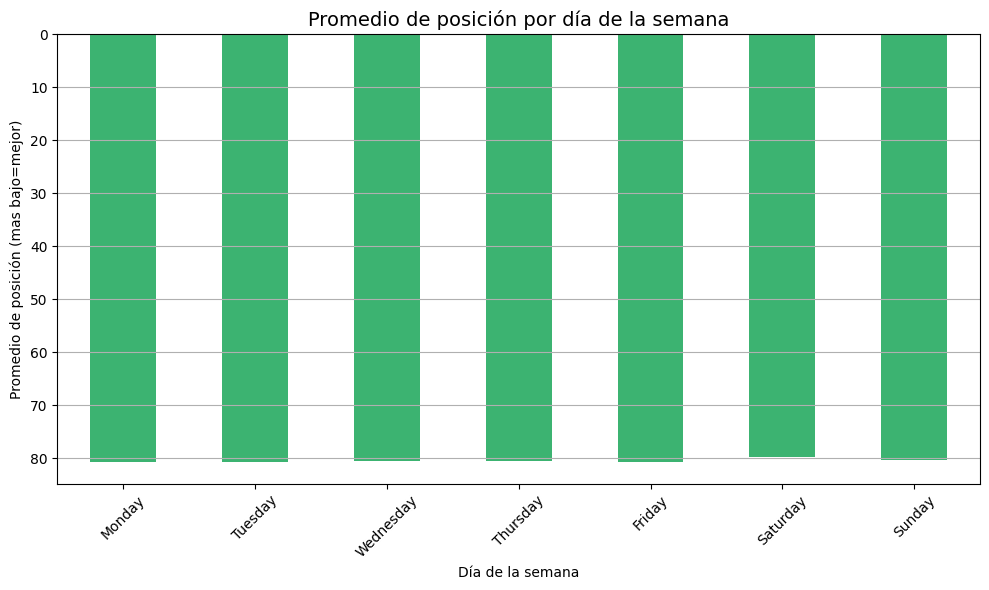

In [ ]:
import matplotlib.pyplot as plt
"""
Grafico bivariado
"""

#Calculamos el promedio por dia
promedio_posicion = df_combinados.groupby("day_of_week")["position"].mean().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])


#Graficamos el promedio por dia
plt.figure(figsize=(10, 6))
promedio_posicion.plot(kind="bar", color="mediumseagreen")
plt.title("Promedio de posición por día de la semana", fontsize=14)
plt.xlabel("Día de la semana")
plt.ylabel("Promedio de posición (mas bajo=mejor)")
plt.gca().invert_yaxis() #mas bajo mejor
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


## 🗓️ Posición promedio en el ranking según el día de la semana

Este gráfico representa la **posición promedio en el ranking de Spotify** que logran las canciones virales (también presentes en TikTok), clasificadas por día de la semana. Cabe destacar que en este tipo de métricas, **una posición más baja es mejor** (por ejemplo, estar en el puesto 1 es mejor que en el 100).

🔍 **Resultado inesperado**:
> Se observa que **no existe una diferencia significativa** entre los días. Todas las posiciones promedio se mantienen bastante estables, lo cual contradice la suposición inicial de que los fines de semana (viernes, sábado) podrían tener un mayor rendimiento viral.

Esto indica que **el éxito de una canción viral no depende del día específico en que aparece en los rankings**, al menos en términos de posicionamiento. En otras palabras, **una canción puede explotar en cualquier momento de la semana**, y lo importante es más bien **su perfil musical** (energía, bailabilidad, positividad) y su nivel de exposición social.

---

📌 **Conclusión parcial**:
> Las marcas no necesariamente deben esperar a un “día ideal” para subirse a un trend, ya que el rendimiento en rankings no está condicionado por el calendario semanal. Lo que importa es actuar con rapidez cuando se detecta una tendencia creciente.


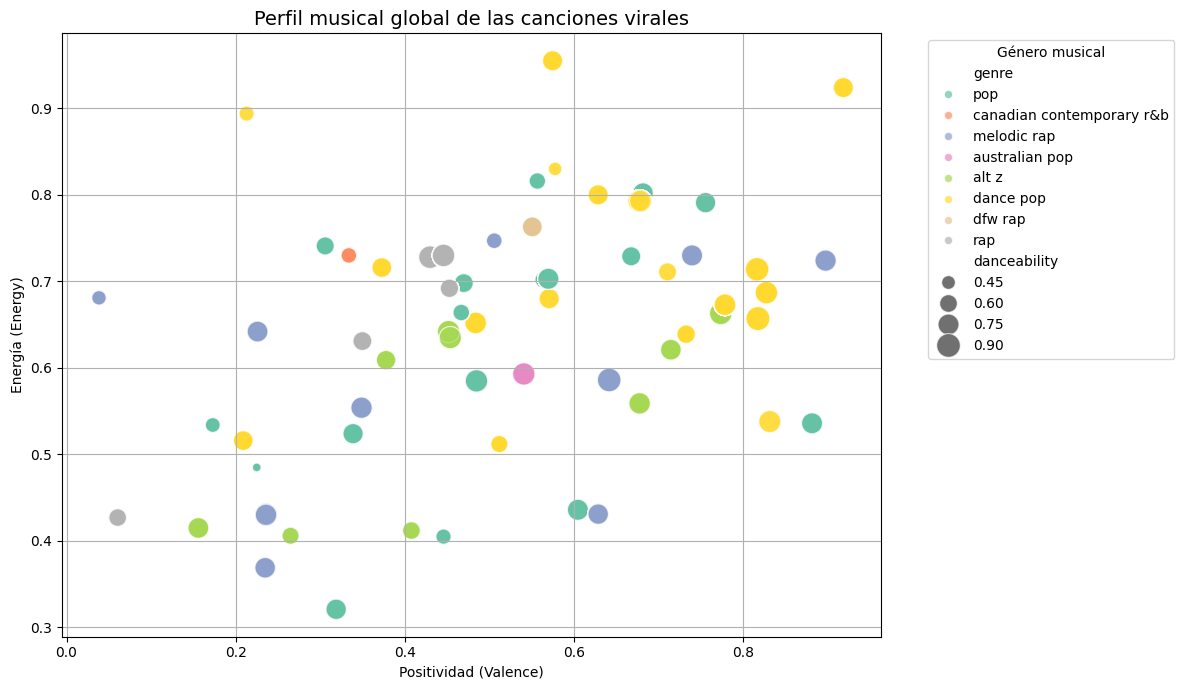

In [ ]:
import seaborn as sns
# Filtramos canciones que tengan género
global_df = df_combinados[df_combinados["genre"].notna()]

# Tomamos los 8 géneros más frecuentes en todos los países
top_genres_global = global_df["genre"].value_counts().head(8).index

# Nos quedamos con esas canciones
global_top = global_df[global_df["genre"].isin(top_genres_global)]

# Gráfico multivariado global
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=global_top,
    x="valence",
    y="energy",
    hue="genre",
    size="danceability",
    sizes=(40, 300),
    alpha=0.7,
    palette="Set2"
)

plt.title("Perfil musical global de las canciones virales", fontsize=14)
plt.xlabel("Positividad (Valence)")
plt.ylabel("Energía (Energy)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Género musical")
plt.tight_layout()
plt.show()

## 🎧 Perfil musical global de canciones virales

Este gráfico muestra la relación entre la positividad (`valence`), la energía (`energy`) y la bailabilidad (`danceability`) de las canciones que se viralizaron en TikTok y Spotify, diferenciadas además por su género musical.

🔍 Se observa que las canciones más ubicadas en el cuadrante superior derecho (energía alta + valence alto), y con puntos grandes (alta bailabilidad), son las que presentan un perfil más propenso a la viralidad.

💃 En particular, géneros como **dance pop** y **alt z** concentran muchas canciones con ese perfil emocional y rítmico. Esto puede orientar a marcas o creadores a elegir mejor qué música utilizar en sus contenidos.

📌 **Conclusión parcial**:
> Las canciones más efectivas para viralizarse comparten tres rasgos: son alegres, energéticas y bailables. Identificar este patrón puede servir como criterio previo al momento de elegir un tema musical para campañas virales o de marca.


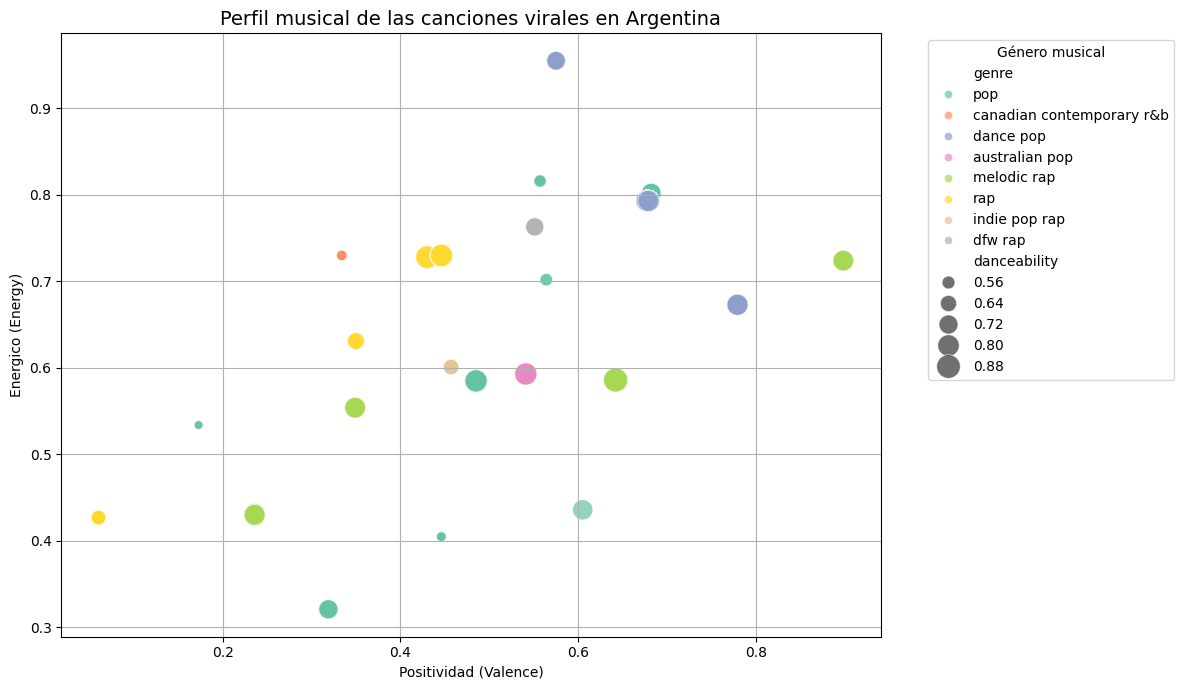

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtramos canciones virales en Argentina que tengan género
argentina_df = df_combinados[
    (df_combinados["country"].str.lower() == "argentina") &
    (df_combinados["genre"].notna())
]

# Filtramos por los 8 géneros más frecuentes
top_generos = argentina_df["genre"].value_counts().head(8).index
argentina_top = argentina_df[argentina_df["genre"].isin(top_generos)]

# Gráfico multivariado
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=argentina_top,
    x="valence",
    y="energy",
    hue="genre",
    size="danceability",
    sizes=(40, 300),
    alpha=0.7,
    palette="Set2"
)

plt.title("Perfil musical de las canciones virales en Argentina", fontsize=14)
plt.xlabel("Positividad (Valence)")
plt.ylabel("Energico (Energy)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Género musical")
plt.tight_layout()
plt.show()

## 🇦🇷 Perfil musical de canciones virales en Argentina

Este gráfico muestra la distribución de canciones virales en Argentina según su positividad (`valence`), energía (`energy`) y bailabilidad (`danceability`), junto con su género musical.

🔍 A diferencia del perfil global, en Argentina **las canciones virales muestran una mayor diversidad emocional**. No todas se agrupan en zonas de alta positividad: hay canciones con valence medio o incluso bajo que igualmente logran viralizarse, especialmente si tienen buena energía y son bailables.

🎧 Se destacan géneros urbanos y alternativos como:
- `melodic rap`
- `indie pop rap`
- `alt pop`

Estos géneros parecen conectar muy bien con el público local, y son buenos candidatos para campañas o contenidos apuntados al mercado argentino.

💃 Además, muchas canciones que se posicionan bien tienen niveles de `danceability` altos, lo que confirma que **las canciones virales en Argentina también son aquellas que invitan al movimiento o tienen potencial coreográfico**.

---

📌 **Conclusión parcial**:
> Las canciones virales en Argentina tienden a mezclar lo emocional con lo rítmico. No todas son “felices y explosivas”, pero sí suelen ser energéticas y bailables. Esto puede guiar a marcas que buscan conectar localmente a través de música que refleje la identidad cultural del país.


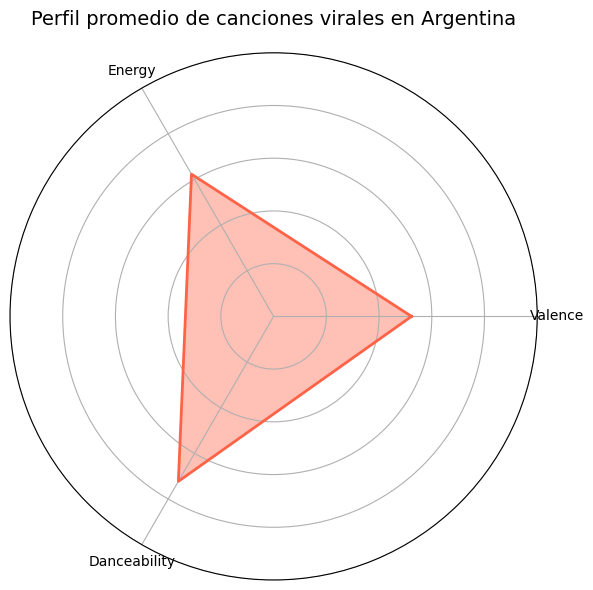

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filtramos el dataset de Argentina
argentina_df = df_combinados[df_combinados["country"].str.lower() == "argentina"]

# Calculamos los promedios
promedios = {
    "Valence": argentina_df["valence"].mean(),
    "Energy": argentina_df["energy"].mean(),
    "Danceability": argentina_df["danceability"].mean()
}

# Datos para el gráfico
labels = list(promedios.keys())
valores = list(promedios.values())

# Radar necesita cerrar el círculo
valores += valores[:1]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# Crear gráfico radar
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.plot(angles, valores, linewidth=2, linestyle='solid', color='tomato')
ax.fill(angles, valores, alpha=0.4, color='tomato')

# Estilo
ax.set_title("Perfil promedio de canciones virales en Argentina", fontsize=14, pad=20)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()

## 📌 Perfil promedio de las canciones virales en Argentina

Este gráfico radar representa el perfil promedio de las canciones virales en Argentina, según tres atributos clave:

- `valence` (positividad emocional)
- `energy` (nivel de intensidad)
- `danceability` (bailabilidad)

📍 El análisis muestra que las canciones que se vuelven virales en Argentina son principalmente:

- 💃 **Bailables**: los valores altos en `danceability` confirman que el movimiento físico y la posibilidad de coreografías siguen siendo claves para el éxito en TikTok.
- 🔋 **Energéticas**: con un ritmo activo y presencia sonora marcada, ideales para captar atención.
- 😶‍🌫️ **Moderadamente alegres**: muchas de estas canciones no son completamente “felices”, lo cual puede responder a una estética emocional que también conecta con el público argentino (melodía nostálgica, letras intensas, etc.).

---

📌 **Conclusión parcial**:
> Este radar permite identificar con rapidez el tipo de canción que conecta con la audiencia local. Marcas, creadores y agencias que busquen subirse a un trend viral deberían elegir temas que sean bailables, con buena energía y que transmitan algo emocionalmente identificable, incluso sin ser 100% alegres.


## 🧠 Conclusión general

El análisis revela que las canciones virales en TikTok y Spotify comparten patrones claros en cuanto a temporalidad (picos en ciertos meses), emociones (valence medio), y ritmo (alta bailabilidad y energía). Para las marcas y agencias que desean aumentar el alcance de sus campañas, **detectar estas señales a tiempo** permite actuar antes de que el trend se enfríe.

Las herramientas utilizadas permiten anticipar el comportamiento viral y, si se aplican en campañas en tiempo real, pueden ser la clave para **transformar una tendencia en resultados concretos**: alcance, conexión emocional, y recordación de marca.


Análisis de Tipos de Viralidad en Canciones mediante Clustering No Supervisado
Y si querés una versión más informal o llamativa, también podés usar:

¿Qué tipo de viral es viral? Descubriendo patrones con KMeans


In [ ]:
df_combinados.columns

Index(['Unnamed: 0', 'country', 'date', 'position', 'uri', 'track', 'title',
       'artist', 'day_of_week', 'title_clean', 'artist_clean', 'track_id',
       'track_name', 'artist_name', 'danceability', 'energy', 'tempo',
       'loudness', 'acousticness', 'valence', 'instrumentalness', 'liveness',
       'mode', 'key', 'speechiness', 'time_signature', 'genres', 'genre',
       'track_name_clean', 'artist_name_clean', 'month'],
      dtype='object')

In [ ]:
# Paso 1: Selección de características
features = [
    'valence', 'energy', 'danceability', 'acousticness',
    'instrumentalness', 'speechiness', 'tempo', 'time_signature'
]

df_features = df_combinados[features].dropna()
df_features.head()

,valence,energy,danceability,acousticness,instrumentalness,speechiness,tempo,time_signature
0,0.682,0.802,0.737,0.468,0.000000,0.0878,144.015,4
1,0.471,0.660,0.799,0.256,0.000000,0.0790,140.040,4
2,0.543,0.548,0.709,0.650,0.000002,0.3530,83.995,4
3,0.560,0.547,0.584,0.655,0.000002,0.3820,83.917,4
4,0.485,0.585,0.830,0.237,0.000000,0.0940,109.978,4


In [ ]:
#Estandarizacion de los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

df_scaled

array([[ 0.86904664,  1.21713637,  0.12568825, ..., -0.19490827,
         0.9469833 ,  0.12976639],
       [-0.14392579,  0.30427548,  0.56582256, ..., -0.2927023 ,
         0.78660399,  0.12976639],
       [ 0.20173305, -0.41572748, -0.07308209, ...,  2.75224832,
        -1.47464352,  0.12976639],
       ...,
       [-1.5409636 , -0.93001531, -2.4867219 , ..., -0.86724226,
        -1.05346121,  0.12976639],
       [-0.13432416, -0.70501438,  0.40254693, ...,  1.46314514,
        -0.42001334,  0.12976639],
       [-0.13432416, -0.70501438,  0.40254693, ...,  1.46314514,
        -0.42001334,  0.12976639]])

### 🔍 Enfoque metodológico: Clustering no supervisado

Debido a que los datos disponibles solo contienen canciones virales (sin una etiqueta que indique canciones no virales), se optó por un modelo de aprendizaje no supervisado: **KMeans**. Este algoritmo permite descubrir grupos naturales en los datos en función de sus características musicales.

El objetivo no es predecir viralidad, sino identificar patrones comunes entre diferentes tipos de canciones virales y así ofrecer estrategias diferenciadas para marcas o creadores.


In [ ]:
from sklearn.cluster import KMeans

# Definimos el modelo con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

# Agregamos la columna de cluster al DataFrame original
df_features['cluster'] = kmeans.labels_
df_features.head()

,valence,energy,danceability,acousticness,instrumentalness,speechiness,tempo,time_signature,cluster
0,0.682,0.802,0.737,0.468,0.000000,0.0878,144.015,4,2
1,0.471,0.660,0.799,0.256,0.000000,0.0790,140.040,4,2
2,0.543,0.548,0.709,0.650,0.000002,0.3530,83.995,4,1
3,0.560,0.547,0.584,0.655,0.000002,0.3820,83.917,4,1
4,0.485,0.585,0.830,0.237,0.000000,0.0940,109.978,4,1


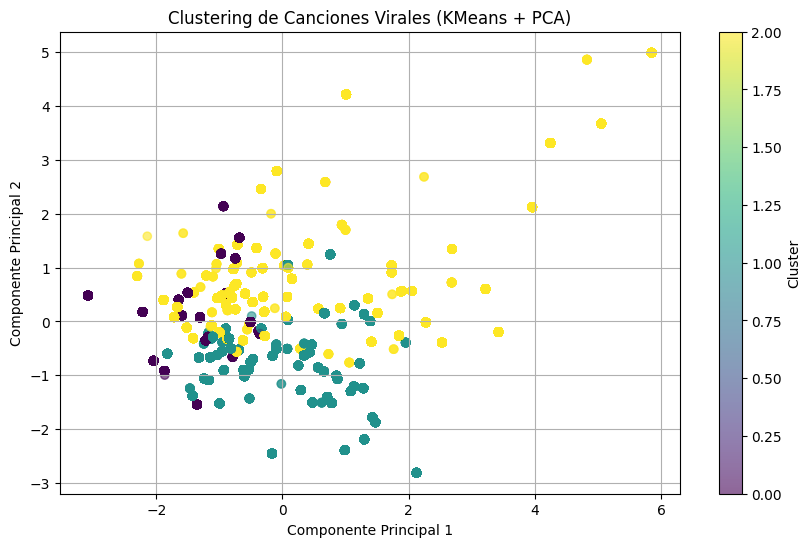

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducimos a 2 componentes principales para visualizar
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)

# Creamos el gráfico
plt.figure(figsize=(10,6))
plt.scatter(components[:, 0], components[:, 1], c=df_features['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clustering de Canciones Virales (KMeans + PCA)")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
# Promedios por cluster
df_features.groupby('cluster').mean()

,valence,energy,danceability,acousticness,instrumentalness,speechiness,tempo,time_signature
cluster,,,,,,,,
0,0.472282,0.722288,0.799986,0.067079,5.412358e-07,0.251536,152.612964,4.000000
1,0.543834,0.520928,0.804400,0.306636,3.545736e-04,0.120984,109.546209,3.844036
2,0.473410,0.660223,0.631782,0.214186,1.848081e-02,0.057993,121.740916,3.989241


 🎼 Visualización final: Perfiles normalizados por cluster

Este gráfico radar compara los tres clusters según sus características musicales, normalizadas entre 0 y 1. Permite visualizar de forma clara qué atributos destacan en cada grupo de canciones virales, facilitando la toma de decisiones creativas o estratégicas basadas en datos.

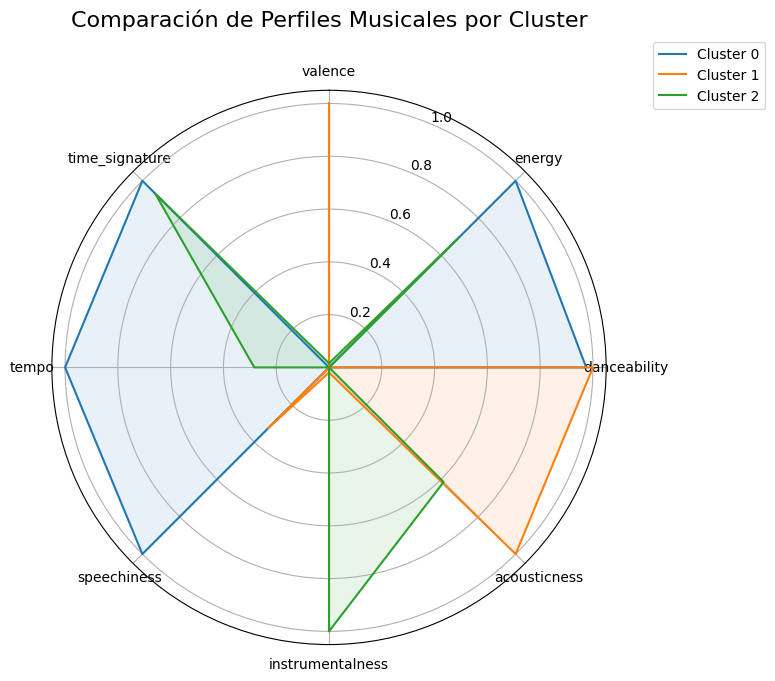

In [38]:
# Crear un DataFrame con los promedios de cada cluster (como el del usuario)
cluster_means = df_features.groupby('cluster').mean()

cluster_means_norm = cluster_means.copy()
for col in cluster_means.columns:
    max_val = cluster_means[col].max()
    min_val = cluster_means[col].min()
    cluster_means_norm[col] = (cluster_means[col] - min_val) / (max_val - min_val)

import numpy as np
import matplotlib.pyplot as plt

# Etiquetas y ángulos
labels = cluster_means_norm.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Iniciamos el gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Dibujamos cada cluster
for i, row in cluster_means_norm.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

# Estética del gráfico
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Ajustes estéticos
plt.title('Comparación de Perfiles Musicales por Cluster', y=1.1, fontsize=16)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

📑 Análisis de Clusters de Canciones Virales
Tras aplicar un algoritmo de clustering no supervisado (KMeans) sobre las características musicales de canciones virales en TikTok y Spotify, se identificaron tres grupos bien diferenciados. A continuación, se describe el perfil de cada cluster:

🎯 Cluster 0: Virales intensas y bailables
Alta energy (0.72) y danceability (0.79).

Muy bajo acousticness (0.06) e instrumentalness (~0).

Tempo elevado (~152 BPM).

Alta speechiness (0.25), lo cual puede indicar presencia de rap, frases habladas o vocales marcadas.

Interpretación: canciones de alto impacto, rápidas, alegres y orientadas a contenido dinámico. Ideales para trends energéticos, challenges o bailes.

🎧 Cluster 1: Canciones virales tranquilas o acústicas
energy y tempo más bajos (0.52 y 109 BPM).

Alta acousticness (0.30) y danceability también elevada (0.80).

valence moderado (0.54).

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df_scaled, kmeans.labels_)
print(f"Silhouette Score del modelo: {sil_score:.2f}")

El **Silhouette Score** obtenido fue de **0.15**, lo cual indica un clustering débil pero aceptable. Esto puede deberse a la complejidad inherente de la música viral, donde muchos estilos se mezclan y no siempre se distinguen con claridad. A pesar de ello, los clusters identificados muestran diferencias consistentes que pueden ser aprovechadas estratégicamente.